In [1]:
!pip install --upgrade tensorflow keras


In [4]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import glob
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('/content/train_dataframes.csv')


In [11]:
df

,datetime,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
0,2015-01-31 01:00:00,962.2865,906.9580,970.3450,938.004850,1,1,0,0,1,25.308496,954.2018
1,2015-01-31 02:00:00,933.3221,863.5135,912.1755,900.284075,1,1,0,0,2,25.141443,913.8660
2,2015-01-31 03:00:00,903.9817,848.4447,900.2688,881.704325,1,1,0,0,3,25.006738,903.3637
3,2015-01-31 04:00:00,900.9995,839.8821,889.9538,876.458825,1,1,0,0,4,24.899713,889.0806
4,2015-01-31 05:00:00,904.3481,847.1073,893.6865,879.190775,1,1,0,0,5,24.821558,910.1472
...,...,...,...,...,...,...,...,...,...,...,...,...
36715,2019-04-09 20:00:00,1362.1477,1376.6220,1335.4711,1360.112475,4,0,0,0,20,29.044763,1397.5788
36716,2019-04-09 21:00:00,1330.7467,1338.3879,1305.3631,1332.959900,4,0,0,0,21,28.539545,1350.5093
36717,2019-04-09 22:00:00,1275.5550,1281.6932,1240.1208,1279.486450,4,0,0,0,22,28.163232,1308.7955
36718,2019-04-09 23:00:00,1200.3537,1209.2950,1165.0237,1199.699525,4,0,0,0,23,27.830194,1232.4521


In [12]:

df.drop(['week_X-2', 'week_X-3', 'week_X-4', 'MA_X-4', 'dayOfWeek',
        'weekend', 'holiday', 'Holiday_ID','datetime'], axis=1, inplace=True)
df.head(20)

,hourOfDay,T2M_toc,DEMAND
0,1,25.308496,954.2018
1,2,25.141443,913.8660
2,3,25.006738,903.3637
3,4,24.899713,889.0806
4,5,24.821558,910.1472
5,6,24.830194,922.1737
6,7,25.799951,939.9442
7,8,26.980310,1077.8575
8,9,28.031824,1179.6601
9,10,28.906061,1255.1569


In [13]:
X = []
Y = []

In [14]:
for i in range(0, df.shape[0]-24*7):
    X.append(df.iloc[i:i+(24*7)]['DEMAND'])
    Y.append(df.iloc[i+(24*7)]['DEMAND'])

In [15]:
x, y = np.array(X), np.array(Y)
y = np.reshape(y, (len(y), 1))

# x = np.delete(x, list(range(1, x.shape[1], 2)), axis=1)
x = np.delete(x, list(range(1, x.shape[0], 2)), axis=0)

y = np.delete(y, list(range(1, y.shape[0], 2)), axis=0)

In [16]:
x.shape

(18276, 168)

In [17]:
y.shape

(18276, 1)

In [18]:
x

array([[ 954.2018,  913.866 ,  903.3637, ..., 1069.1463, 1024.2274,
         963.816 ],
       [ 903.3637,  889.0806,  910.1472, ...,  963.816 ,  918.182 ,
         892.3819],
       [ 910.1472,  922.1737,  939.9442, ...,  892.3819,  877.2844,
         862.8613],
       ...,
       [1395.9746, 1366.2091, 1357.3419, ..., 1525.4054, 1391.0816,
        1393.7269],
       [1357.3419, 1320.5768, 1224.1257, ..., 1393.7269, 1412.9238,
        1397.5788],
       [1224.1257, 1164.7273, 1114.9916, ..., 1397.5788, 1350.5093,
        1308.7955]])

In [19]:
y

array([[ 918.182 ],
       [ 877.2844],
       [ 847.2567],
       ...,
       [1412.9238],
       [1350.5093],
       [1232.4521]])

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred = model.predict(x_test)
y_pred

array([1196.72420042, 1252.69241434, 1349.43665346, ...,  940.12383718,
        946.44678726, 1320.83022912])

In [25]:
from sklearn.metrics import r2_score

In [26]:
r2_score(y_test,y_pred)

0.9838775221278454

Text(0.5, 1.0, 'Actual vs Predicted')

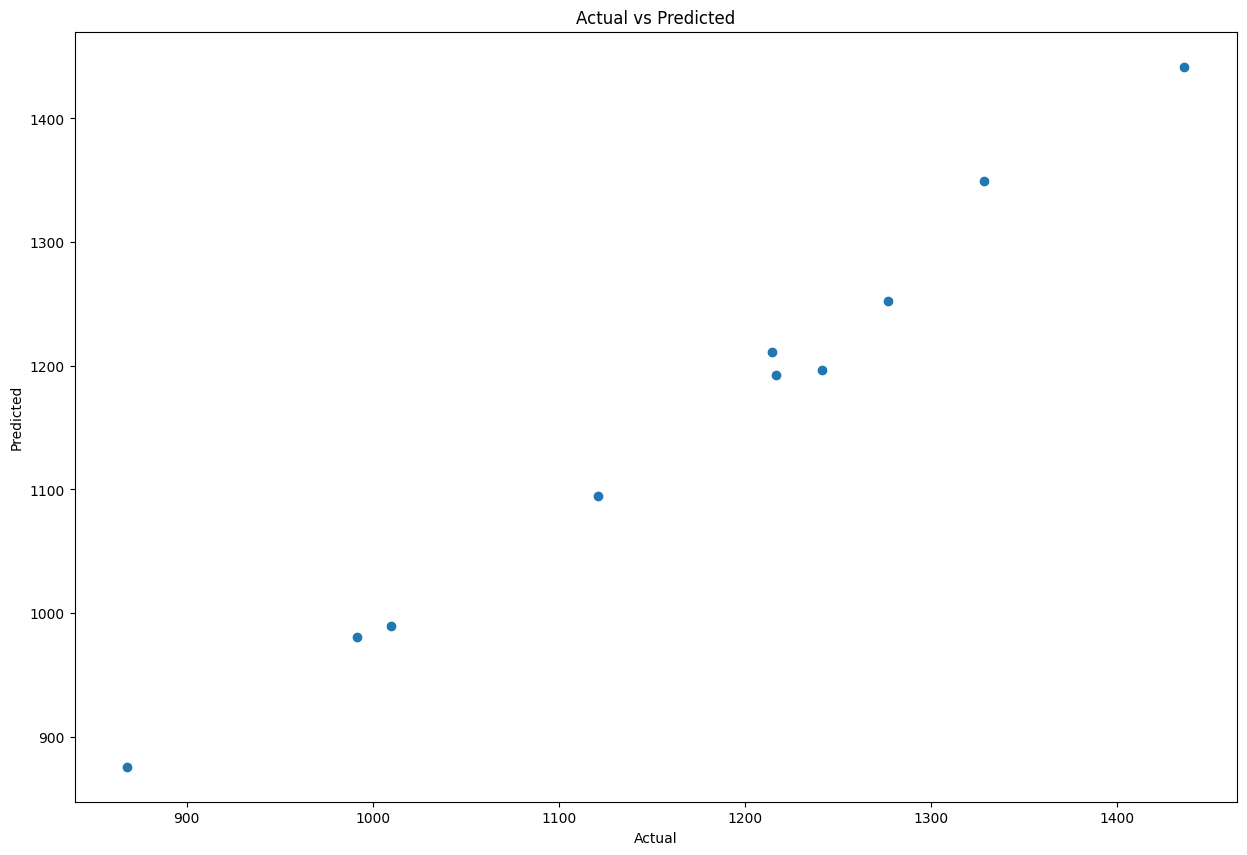

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test[:10],y_pred[:10])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [28]:
pred_y_df = pd.DataFrame({'Actual Values':y_test,'Predicted_values':y_pred,'Difference':y_test-y_pred})
pred_y_df

,Actual Values,Predicted_values,Difference
0,1241.2690,1196.724200,44.544800
1,1276.8035,1252.692414,24.111086
2,1328.5859,1349.436653,-20.850753
3,868.2087,875.744915,-7.536215
4,1216.5067,1192.345487,24.161213
...,...,...,...
7306,1446.5462,1454.888823,-8.342623
7307,1268.8904,1249.399914,19.490486
7308,949.7747,940.123837,9.650863
7309,947.6634,946.446787,1.216613


In [29]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

In [30]:
mean_absolute_percentage_error(pred_y_df['Actual Values'],pred_y_df['Predicted_values'])

1.34

In [31]:
100-1.85

98.15

In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred_y_df['Actual Values'],pred_y_df['Predicted_values']))
rmse

24.397361508972132